<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [4]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-03-12 19:31:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2020-03-12 19:31:12 (202 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [5]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df.shape

(346, 10)

### Convert to date time object 

In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /Users/ahmedmasood/opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         3.0 MB  anaconda
    openssl-1.1.1d             |       h1de35cc_2         3.4 MB  anaconda
    seaborn-0.9.0              |           py37_0         379 KB  anaconda
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                         conda-forge --> anaconda
  openssl                                         pkgs/main --> anaconda
  seaborn                                         pkgs/main --> anaconda



openssl-1.1.1d       | 3.4 MB    | ########################

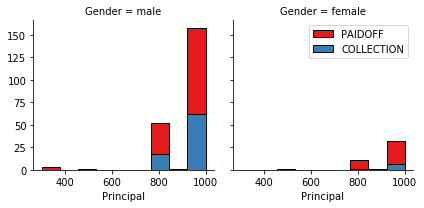

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

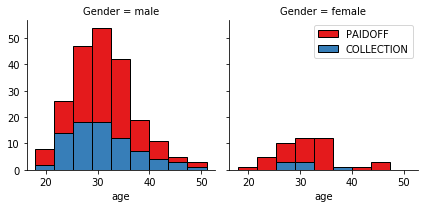

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

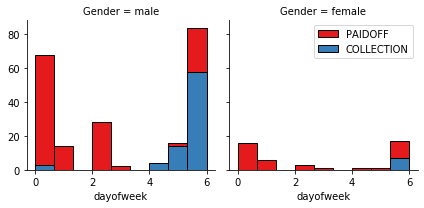

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Train Test Split
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 


In [22]:
from sklearn.model_selection import train_test_split #import train_test_split evaluation method
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857


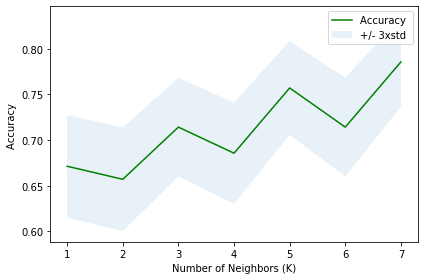

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 8
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

mean_acc

plt.plot(range(1,Ks),mean_acc,'g') #Plots all accuracies on a graph  
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [24]:
yhat_proba = neigh.predict_proba(X_test)
yhat_proba

array([[0.42857143, 0.57142857],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.85714286, 0.14285714],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [0.14285714, 0.85714286],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.28571429, 0.71428571],
       [0.42857143, 0.57142857],
       [0.71428571, 0.28571429],
       [0.28571429, 0.71428571],
       [0.14285714, 0.85714286],
       [0.57142857, 0.42857143],
       [0.71428571, 0.28571429],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [0.14285714, 0.85714286],
       [0.

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5,min_samples_split=276) #Creates an instance of the DecisionTree. Specify criterion entropy so we can see the information gain of each node.
decTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=276,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
decTree.fit(X_train,y_train)
predy = decTree.predict(X_test)
from sklearn import metrics #imports metrics to check accuracy of the model.
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predy))

DecisionTrees's Accuracy:  0.7857142857142857


In [28]:
pred_proba = decTree.predict_proba(X_test)
pred_proba

array([[0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.01724138, 0.98275862],
       [0.01724138, 0.98275862],
       [0.01724138, 0.98275862],
       [0.01724138, 0.98275862],
       [0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.01724138, 0.98275862],
       [0.43125   , 0.56875   ],
       [0.01724138, 0.98275862],
       [0.43125   , 0.56875   ],
       [0.01724138, 0.98275862],
       [0.01724138, 0.98275862],
       [0.43125   , 0.56875   ],
       [0.01724138, 0.98275862],
       [0.43125   , 0.56875   ],
       [0.01724138, 0.98275862],
       [0.43125   , 0.56875   ],
       [0.01724138, 0.98275862],
       [0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.43125   , 0.56875   ],
       [0.01724138, 0.98275862],
       [0.

In [29]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

from sklearn.externals.six import StringIO #imports all python packages for plotting a decision tree
import pydotplus #Provides a Python interface to Graphviz Dot language
import matplotlib.image as mpimg #Provides an image module to support image loading rescaling and display operations.
from sklearn import tree #imports software for plotting decision trees
%matplotlib inline #inline allows the backend of plotting functions to be inline with the frontend.

Solving environment: / 
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-64::openssl-1.1.1d-h1de35ccdone

## Package Plan ##

  environment location: /Users/ahmedmasood/opt/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                            anaconda --> conda-forge



conda-4.8.2          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: \ 
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-

/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
UsageError: unrecognized arguments: #inline allows the backend of plotting functions to be inline with the frontend.


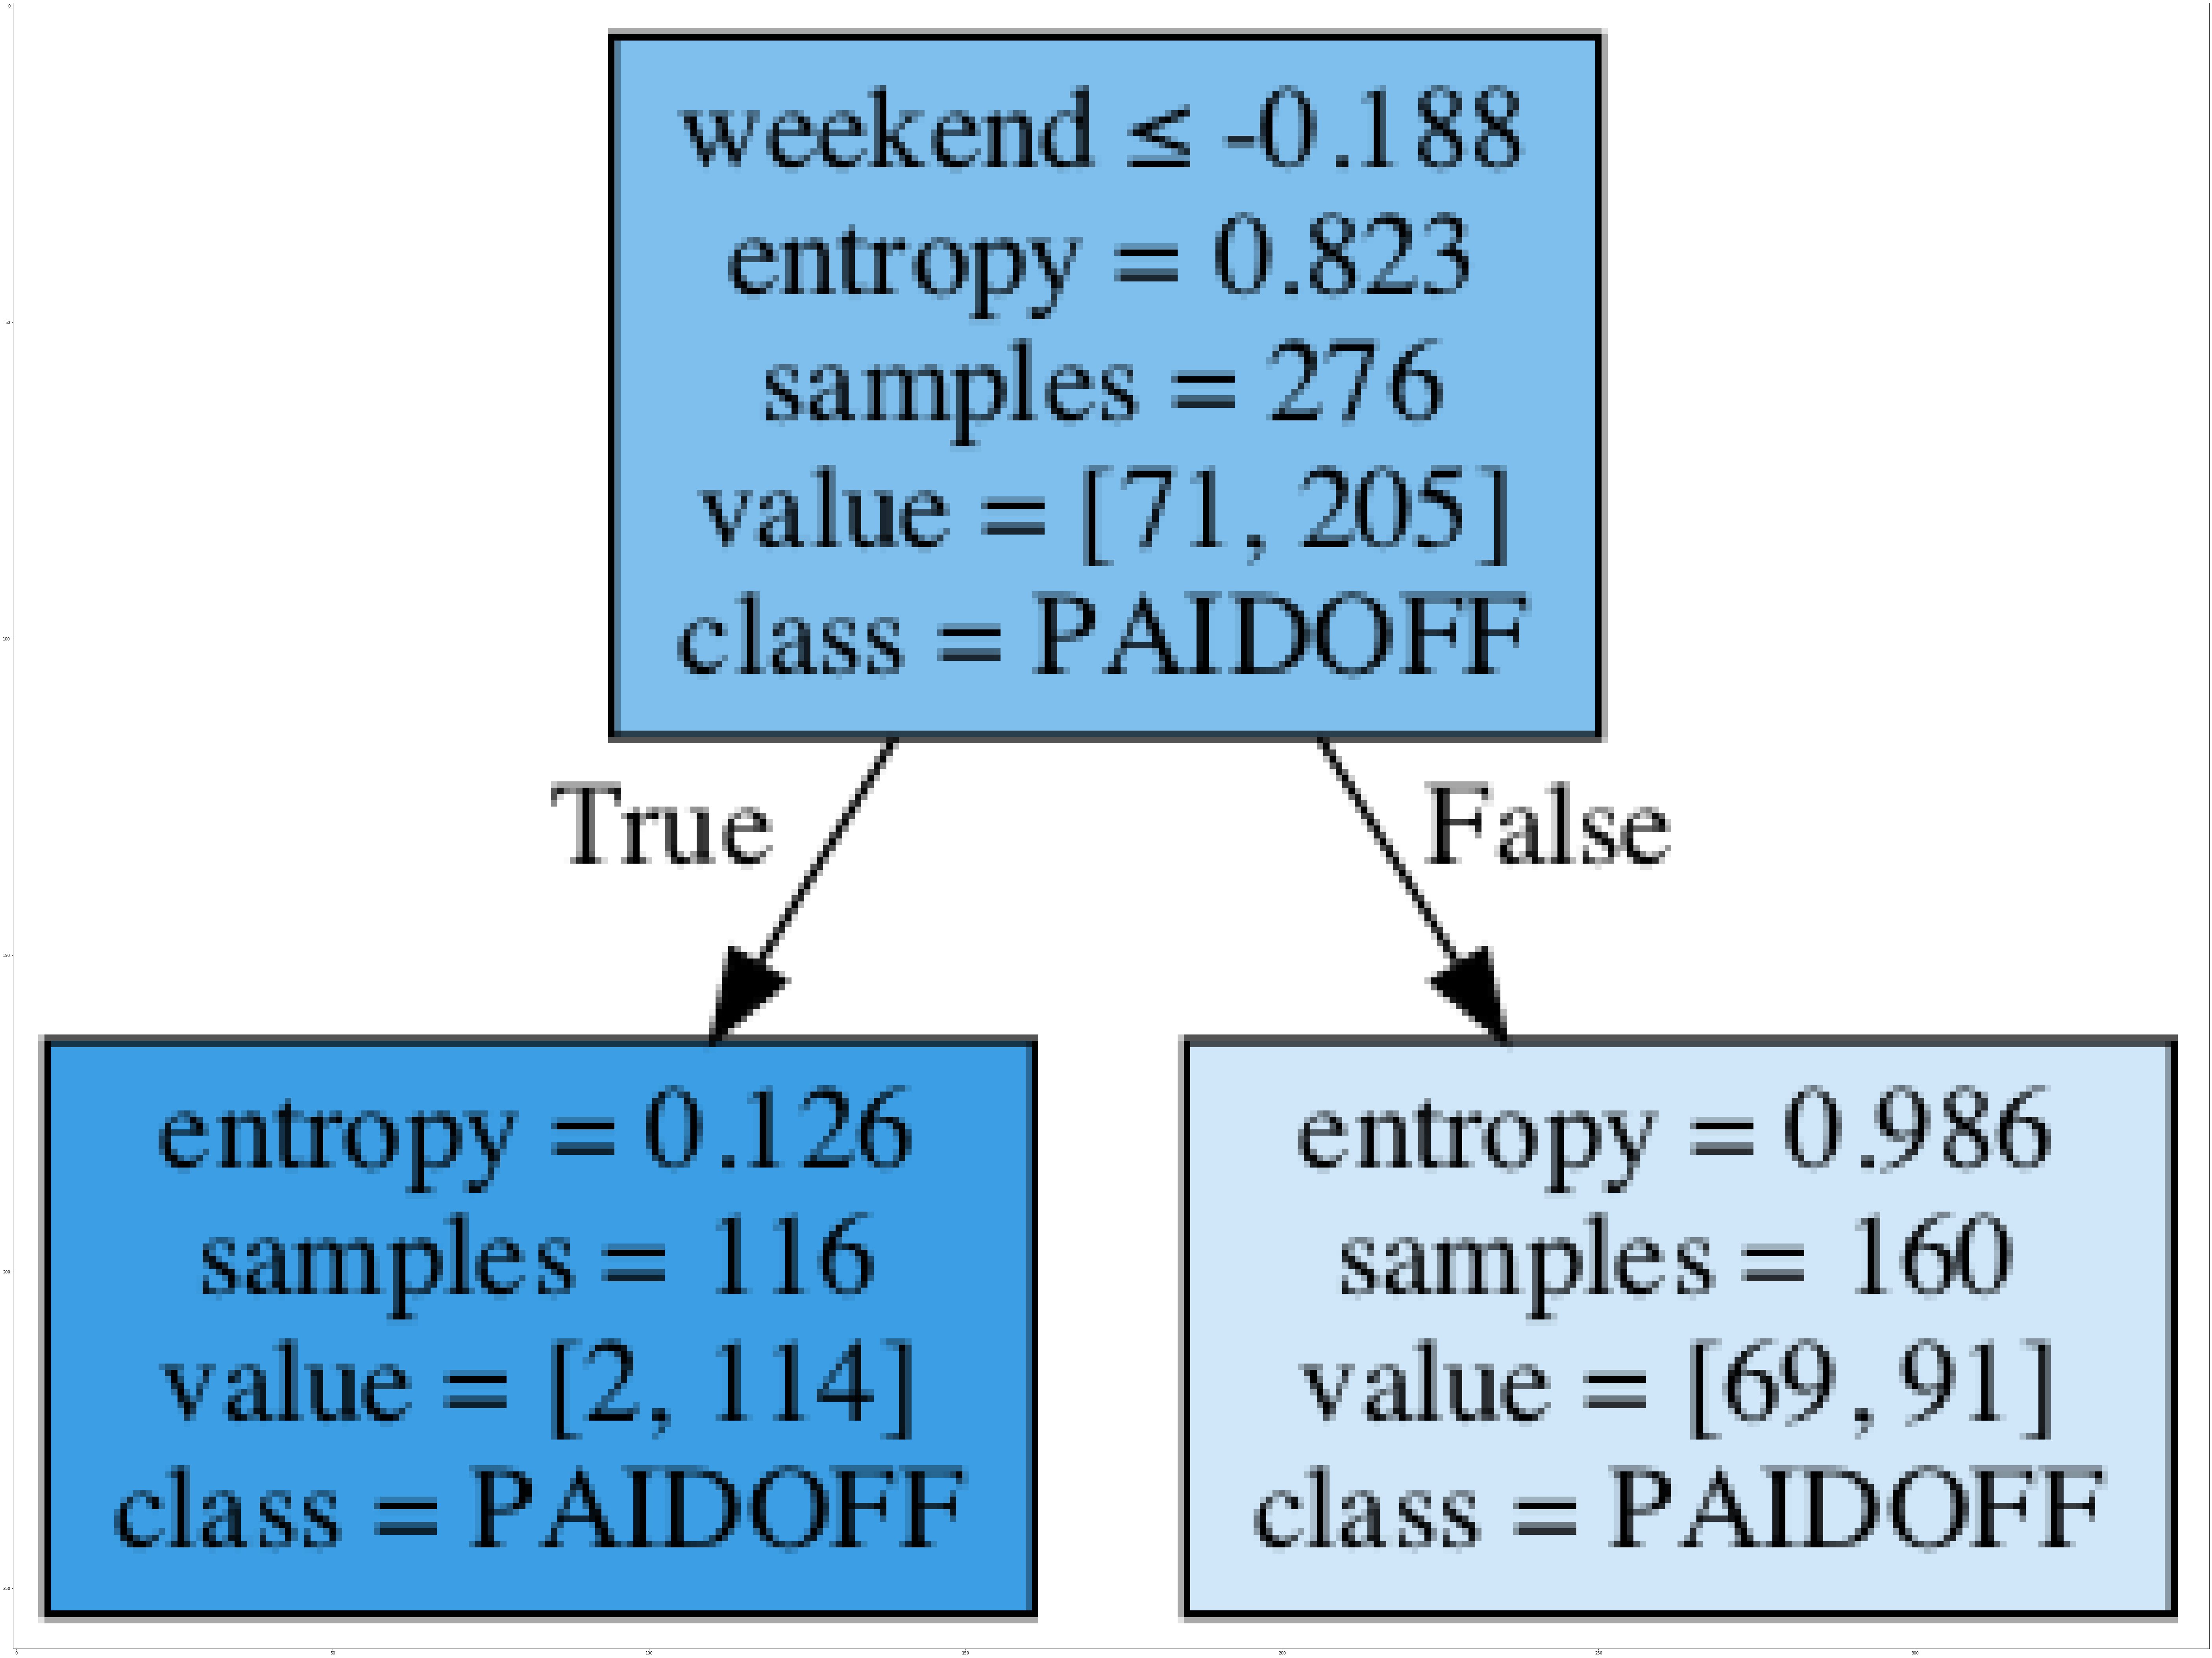

In [30]:
dot_data = StringIO() #plots decision tree 
filename = "dectree.png"

featureNames = Feature.columns
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(decTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [31]:
from sklearn import svm #imports SVM
clf = svm.SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train) 

/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
yh = clf.predict(X_test) #predicts values for X function
yh [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [33]:
print("Support Vector Machine Accuracy: ", metrics.accuracy_score(y_test, yh))

Support Vector Machine Accuracy:  0.7428571428571429


In [ ]:
yhprob = clf.predict_proba(X_test)
yhprob

# Logistic Regression

In [34]:
from sklearn import preprocessing
l=preprocessing.LabelEncoder()
l.fit(df['loan_status'].tolist())
test=l.transform(df['loan_status'])
df=df.assign(loan_status=test)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,0,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,1
342,395,395,0,1000,30,2016-09-11,2016-10-10,25,High School or Below,0,6,1
343,397,397,0,800,15,2016-09-12,2016-09-26,39,college,0,0,0
344,398,398,0,1000,30,2016-09-12,2016-11-10,28,college,0,0,0


In [35]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [36]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [37]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [73]:
from sklearn.linear_model import LogisticRegression #Import Logistic Regression and fit to the X and y training data
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='newton-cg').fit(X_train,y_train)
LR

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
yha = LR.predict(X_test)
from sklearn import metrics #imports metrics to check accuracy of the model.
import matplotlib.pyplot as plt
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, yha))

Logistic Regression Accuracy:  0.7714285714285715


In [75]:
yha_prob = LR.predict_proba(X_test) #returns estimates for all classes ordered by the label of classes. The first column is the probability of class 1 and second colum is probabiliyt of class 0
yha_prob

array([[0.47119047, 0.52880953],
       [0.3571984 , 0.6428016 ],
       [0.06428917, 0.93571083],
       [0.08720115, 0.91279885],
       [0.06491815, 0.93508185],
       [0.07241091, 0.92758909],
       [0.42387376, 0.57612624],
       [0.39303449, 0.60696551],
       [0.08720115, 0.91279885],
       [0.42920173, 0.57079827],
       [0.08225165, 0.91774835],
       [0.42390673, 0.57609327],
       [0.04156262, 0.95843738],
       [0.09511936, 0.90488064],
       [0.2907508 , 0.7092492 ],
       [0.03400487, 0.96599513],
       [0.53494321, 0.46505679],
       [0.05533709, 0.94466291],
       [0.43956827, 0.56043173],
       [0.0709703 , 0.9290297 ],
       [0.27515661, 0.72484339],
       [0.41613089, 0.58386911],
       [0.50307936, 0.49692064],
       [0.37990838, 0.62009162],
       [0.23271505, 0.76728495],
       [0.48712181, 0.51287819],
       [0.49509934, 0.50490066],
       [0.18648934, 0.81351066],
       [0.44744644, 0.55255356],
       [0.02590867, 0.97409133],
       [0.

In [76]:
#%matplotlib inline #inline allows the backend of plotting functions to be inline with the frontend.
import matplotlib.pyplot as plt #Provides a MATLAB like plotting function
from sklearn.metrics import classification_report, confusion_matrix #Confusion matrix is imported
import itertools

Confusion matrix, without normalization
[[0.47119047 0.52880953]
 [0.3571984  0.6428016 ]
 [0.06428917 0.93571083]
 [0.08720115 0.91279885]
 [0.06491815 0.93508185]
 [0.07241091 0.92758909]
 [0.42387376 0.57612624]
 [0.39303449 0.60696551]
 [0.08720115 0.91279885]
 [0.42920173 0.57079827]
 [0.08225165 0.91774835]
 [0.42390673 0.57609327]
 [0.04156262 0.95843738]
 [0.09511936 0.90488064]
 [0.2907508  0.7092492 ]
 [0.03400487 0.96599513]
 [0.53494321 0.46505679]
 [0.05533709 0.94466291]
 [0.43956827 0.56043173]
 [0.0709703  0.9290297 ]
 [0.27515661 0.72484339]
 [0.41613089 0.58386911]
 [0.50307936 0.49692064]
 [0.37990838 0.62009162]
 [0.23271505 0.76728495]
 [0.48712181 0.51287819]
 [0.49509934 0.50490066]
 [0.18648934 0.81351066]
 [0.44744644 0.55255356]
 [0.02590867 0.97409133]
 [0.35335653 0.64664347]
 [0.32187484 0.67812516]
 [0.38701874 0.61298126]
 [0.38547803 0.61452197]
 [0.22698691 0.77301309]
 [0.32475577 0.67524423]
 [0.43956827 0.56043173]
 [0.04617662 0.95382338]
 [0.335935

ValueError: Unknown format code 'd' for object of type 'float'

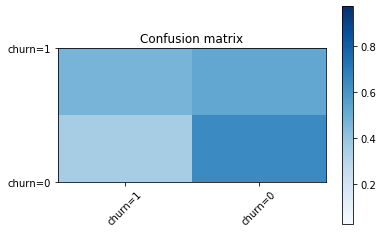

In [82]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yha, labels=[1,0]))
    
    # Compute confusion matrix without normalization
    cnf_matrix = confusion_matrix(y_test, yha, labels=[1,0])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
plot_confusion_matrix(yha_prob, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yha)) #classification report
    

# Model Evaluation using Test set

In [83]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [84]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-03-12 19:45:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-03-12 19:45:55 (267 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [85]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [87]:
#KNN accuracy
print("Jaccard accuracy for KNN: ", jaccard_similarity_score(y_test, yhat))
print("F1 score accuracy for KNN: ", f1_score(y_test, yhat, average='weighted'))
print("Log loss accuracy for KNN: ", log_loss(y_test, yhat_proba))

Jaccard accuracy for KNN:  0.7857142857142857
F1 score accuracy for KNN:  0.7766540244416351
Log loss accuracy for KNN:  0.46719489000030034


/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [88]:
#DecTree accuracy
print("Jaccard accuracy for DecTree: ", jaccard_similarity_score(y_test, predy))
print("F1 score accuracy for DecTree: ", f1_score(y_test, predy, average='weighted'))
print("Log loss accuracy for DecTree: ", log_loss(y_test, pred_proba))

Jaccard accuracy for DecTree:  0.7857142857142857
F1 score accuracy for DecTree:  0.6914285714285714
Log loss accuracy for DecTree:  0.48209329649670735


/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
#SVM accuracy
print("Jaccard accuracy for SVM: ", jaccard_similarity_score(y_test, yh))
print("F1 score accuracy for SVM: ", f1_score(y_test, yh, average='weighted'))


Jaccard accuracy for SVM:  0.7428571428571429
F1 score accuracy for SVM:  0.7275882012724117


/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [90]:
#LR accuracy
print("Jaccard accuracy for LR: ", jaccard_similarity_score(y_test, yha))
print("F1 score accuracy for LR: ", f1_score(y_test, yha, average='weighted'))
print("Log loss accuracy for LR: ", log_loss(y_test, yha_prob))

Jaccard accuracy for LR:  0.7714285714285715
F1 score accuracy for LR:  0.7064793130366899
Log loss accuracy for LR:  0.48275353245267294


/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.79    | 0.78     | 0.58    |
| Decision Tree      | 0.64    | 0.67     | 1.35    |
| SVM                | 0.74    | 0.73     | 0.52    |
| LogisticRegression | 0.69    | 0.67     | 0.58    |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>